### Test on 2017

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import AutoETS
from darts.metrics import mape, mae, rmse

sp500 = yf.Ticker("^GSPC")
df = sp500.history(start="2010-01-01", end="2017-12-31")[["Close"]].dropna()
df.index = pd.to_datetime(df.index).tz_localize(None)

all_bd = pd.date_range(df.index.min(), df.index.max(), freq="B")
df = df.reindex(all_bd)
df["Close"].ffill(inplace=True)

weekly = df["Close"].resample("W-FRI").last().to_frame()

# convert to a darts TimeSeries
series = TimeSeries.from_series(
    weekly["Close"],
    fill_missing_dates=True,
    freq="W"
)

# split into train (up to 2012-2016) and test (2017)
train_ts, test_ts = series.split_before(pd.Timestamp("2017-01-01"))

Importing plotly failed. Interactive plots will not work.
c:\Users\USER\Desktop\Time_series_evaluation\.venv\Lib\site-packages\fs\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
C:\Users\USER\AppData\Local\Temp\ipykernel_2868\2842710166.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the opera

### Let ETS find best parameter

In [2]:
auto_ets = AutoETS(season_length=52, model="ZZZ") # zzz is auto everything

auto_ets.fit(train_ts)

AutoETS(add_encoders=None, quantiles=None, random_state=None, season_length=52, model=ZZZ)

In [3]:
print(auto_ets.model_params)

OrderedDict({'add_encoders': None, 'quantiles': None, 'random_state': None, 'season_length': 52, 'model': 'ZZZ'})


### Set parameter yourself

https://nixtlaverse.nixtla.io/statsforecast/src/core/models.html#autoets-2

The state-space equations can be determined based on their 

M multiplicative, 

A additive, 

Z optimized,

N ommited components

E can choose from [M, A, Z], T can chose [N, A, M, Z], and S can choose [N, M, A, Z].

In [61]:
auto_ets = AutoETS(season_length=52, model="MZM")

auto_ets.fit(train_ts)

AutoETS(add_encoders=None, quantiles=None, random_state=None, season_length=52, model=MZM)

In [65]:
# forecast the same number of steps as in the test set
h = len(test_ts)
ETS_forecast = auto_ets.predict(n=h)

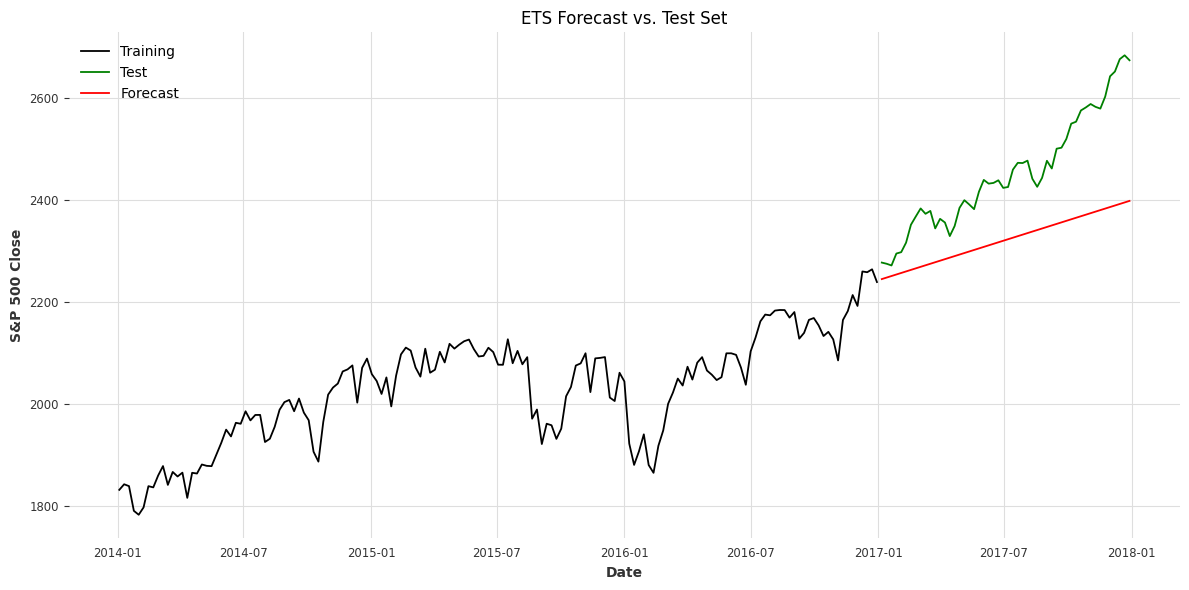

MAPE: 5.20%
MAE:  130.16
RMSE: 146.99



In [75]:
# get only the part of train_ts from 2014-01-01 onward
train_slice = train_ts.slice(pd.Timestamp("2014-01-01"), train_ts.end_time())

# plot train, test, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_slice.time_index, train_slice.values(), label="Training")
plt.plot(test_ts.time_index, test_ts.values(), label="Test", color="green")
plt.plot(ETS_forecast.time_index, ETS_forecast.values(), label="Forecast", color="red")

plt.title("ETS Forecast vs. Test Set")
plt.xlabel("Date")
plt.ylabel("S&P 500 Close")
plt.legend()
plt.tight_layout()
plt.show()

print(f"MAPE: {mape(test_ts, ETS_forecast):.2f}%")
print(f"MAE:  {mae(test_ts, ETS_forecast):.2f}")
print(f"RMSE: {rmse(test_ts, ETS_forecast):.2f}\n")

### Test on 2023 and 2024

In [76]:
# load data
df = sp500.history(start="2014-01-01", end="2024-12-31")[["Close"]].dropna()
df.index = pd.to_datetime(df.index).tz_localize(None)

# Fix missing data
all_bd = pd.date_range(df.index.min(), df.index.max(), freq="B")
df = df.reindex(all_bd)
df["Close"].ffill(inplace=True)

weekly = df["Close"].resample("W-FRI").last().to_frame()

# convert to a darts TimeSeries
series = TimeSeries.from_series(
    weekly["Close"],
    fill_missing_dates=True,
    freq="W"
)

# split into train (up to 2012-2022) and test (2023-2024)
train_ts_2, test_ts_2 = series.split_before(pd.Timestamp("2023-01-01"))

C:\Users\USER\AppData\Local\Temp\ipykernel_2696\3240597983.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Close"].ffill(inplace=True)


In [87]:
auto_ets_2 = AutoETS(season_length=52, model="ZZZ") # zzz is auto everything, AAN is fine here as well

auto_ets_2.fit(train_ts_2)

AutoETS(add_encoders=None, quantiles=None, random_state=None, season_length=52, model=ZZZ)

In [88]:
# forecast the same number of steps as in the test set
h = len(test_ts_2)
ETS_forecast_2 = auto_ets_2.predict(n=h)

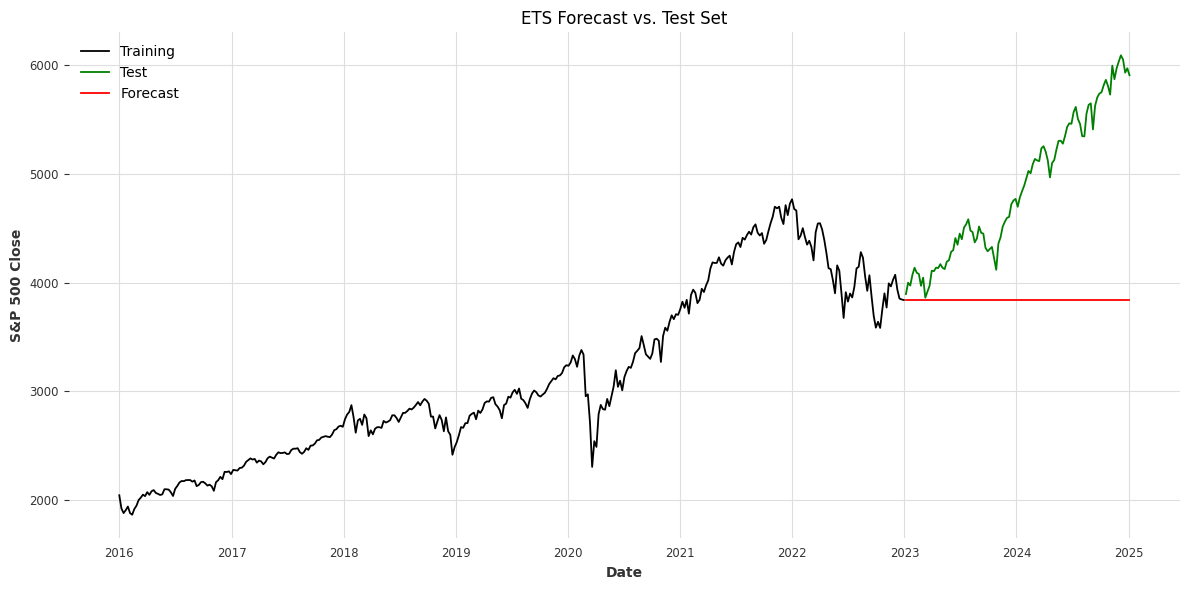

MAPE: 19.77%
MAE:  1031.89
RMSE: 1220.38



In [89]:
# get only the part of train_ts from 2016-01-01 onward
train_slice_2 = train_ts_2.slice(pd.Timestamp("2016-01-01"), train_ts_2.end_time())

# plot train, test, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_slice_2.time_index, train_slice_2.values(), label="Training")
plt.plot(test_ts_2.time_index, test_ts_2.values(), label="Test", color="green")
plt.plot(ETS_forecast_2.time_index, ETS_forecast_2.values(), label="Forecast", color="red")

plt.title("ETS Forecast vs. Test Set")
plt.xlabel("Date")
plt.ylabel("S&P 500 Close")
plt.legend()
plt.tight_layout()
plt.show()

print(f"MAPE: {mape(test_ts_2, ETS_forecast_2):.2f}%")
print(f"MAE:  {mae(test_ts_2, ETS_forecast_2):.2f}")
print(f"RMSE: {rmse(test_ts_2, ETS_forecast_2):.2f}\n")

### Backtesting

In [97]:
df = sp500.history(start="2016-01-01", end="2024-12-31")[["Close"]].dropna()
df.index = pd.to_datetime(df.index).tz_localize(None)
all_bd = pd.date_range(df.index.min(), df.index.max(), freq="B")
df = df.reindex(all_bd)
df["Close"].ffill(inplace=True)

# resample to weekly
weekly = df["Close"].resample("W-FRI").last().to_frame()

# convert to a darts TimeSeries
series = TimeSeries.from_series(
    weekly["Close"],
    fill_missing_dates=True,
    freq="W"
)

C:\Users\USER\AppData\Local\Temp\ipykernel_2696\400281087.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Close"].ffill(inplace=True)


In [98]:
# back test period
backtest_start = pd.Timestamp("2024-01-01")
backtest_end   = pd.Timestamp("2024-12-31")

auto_ets_2.fit(series[:backtest_start])

AutoETS(add_encoders=None, quantiles=None, random_state=None, season_length=52, model=ZZZ)

In [99]:
# perform the historical (rolling) forecasts
backtest_forecast = auto_ets_2.historical_forecasts(
    series=series,
    start=backtest_start,
    forecast_horizon=1,    # 1 week ahead
    stride=1,              # roll forward 1 week each time
    retrain=True,         # No re-fit on all data up to each forecast point
    last_points_only=True  # keep only the 1-step-ahead point per window
)

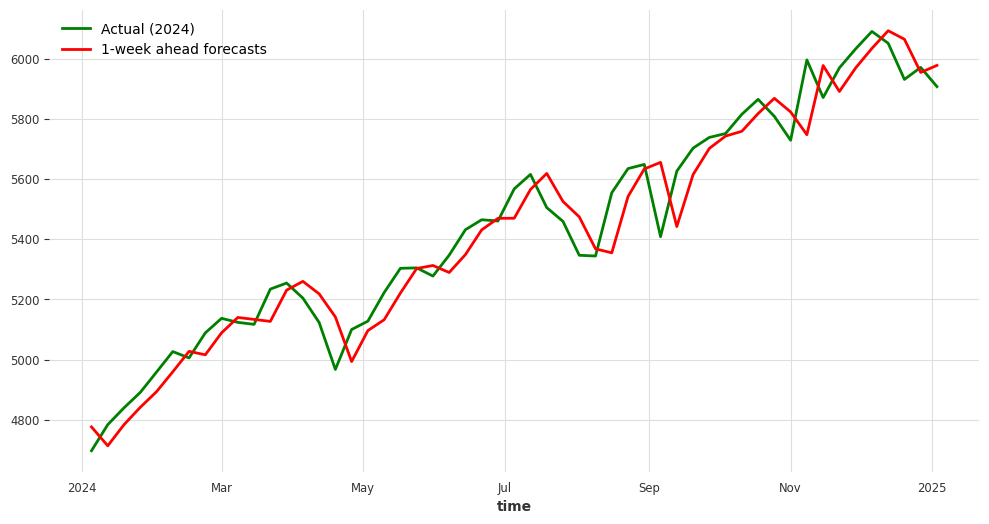

MAPE: 1.38%
MAE:  74.94
RMSE: 92.79


In [100]:
# slice actuals to the same indices
actuals_bt = series[backtest_start:backtest_end]

# plot
plt.figure(figsize=(12,6))
actuals_bt.plot(label="Actual (2024)", color="green")
backtest_forecast.plot(label="1-week ahead forecasts", color="red")
plt.legend()
plt.show()

# evaluate
print(f"MAPE: {mape(actuals_bt, backtest_forecast):.2f}%")
print(f"MAE:  {mae(actuals_bt, backtest_forecast):.2f}")
print(f"RMSE: {rmse(actuals_bt, backtest_forecast):.2f}")